# W6 Lab Assignment

Deep dive into Histogram and boxplot.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set_style('white')

%matplotlib inline 

# Histogram


Let's revisit the table from the class

| Hours | Frequency |
|-------|-----------|
| 0-1   | 4,300     |
| 1-3   | 6,900     |
| 3-5   | 4,900     |
| 5-10  | 2,000     |
| 10-24 | 2,100     |

You can draw a histogram by just providing bins and counts instead of a list of numbers. So, let's do that for convenience. 

In [2]:
bins = [0, 1, 3, 5, 10, 24]
data = {0.5: 4300, 2: 6900, 4: 4900, 7: 2000, 15: 2100} 

Draw histogram using this data. Useful query: [Google search: matplotlib histogram pre-counted](https://www.google.com/search?client=safari&rls=en&q=matplotlib+histogram+already+counted&ie=UTF-8&oe=UTF-8#q=matplotlib+histogram+pre-counted)

In [16]:
min_bin = np.min(list(data.keys()))
max_bin = np.max(list(data.keys()))

In [24]:
int(np.round(max_bin - min_bin + 1))

16

<Container object of 16 artists>

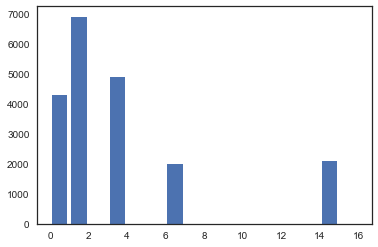

In [26]:
# TODO: draw a histogram with pre-counted data. 
#plt.xlabel("Hours")

min_bin = np.min(list(data.keys()))
max_bin = np.max(list(data.keys()))

bins = np.arange(min_bin, max_bin + 1)
vals = np.zeros(int(np.round(max_bin - min_bin + 1)))

for k,v in data.items():
    vals[int(k - min_bin)] = v

plt.bar(bins, vals)

(array([ 4300.,  6900.,  4900.,     0.,  2000.,     0.,     0.,     0.,
            0.,  2100.]),
 array([  0.5 ,   1.95,   3.4 ,   4.85,   6.3 ,   7.75,   9.2 ,  10.65,
         12.1 ,  13.55,  15.  ]),
 <a list of 10 Patch objects>)

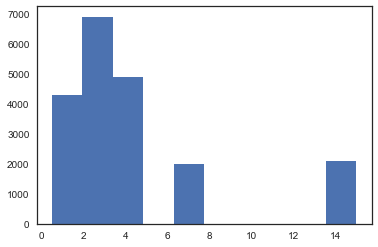

In [27]:
val, weight = zip(*[(k, v) for k,v in data.items()])
plt.hist(val, weights=weight)

(array([ 4300.,  6900.,  4900.,     0.,  2000.,     0.,     0.,     0.,
            0.,  2100.]),
 array([  0.5 ,   1.95,   3.4 ,   4.85,   6.3 ,   7.75,   9.2 ,  10.65,
         12.1 ,  13.55,  15.  ]),
 <a list of 10 Patch objects>)

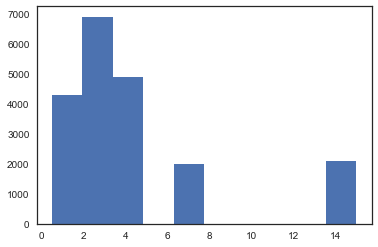

In [37]:
plt.hist(list(data.keys()), weights=list(data.values()))

As you can see, the **default histogram does not normalize with binwidth and simply shows the counts**! This can be very misleading if you are working with variable bin width. One simple way to fix this is using the option [`normed`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). 

(array([ 0.14680778,  0.23557528,  0.16729259,  0.        ,  0.06828269,
         0.        ,  0.        ,  0.        ,  0.        ,  0.07169682]),
 array([  0.5 ,   1.95,   3.4 ,   4.85,   6.3 ,   7.75,   9.2 ,  10.65,
         12.1 ,  13.55,  15.  ]),
 <a list of 10 Patch objects>)

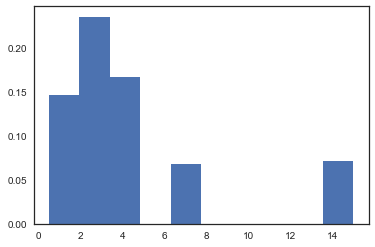

In [34]:
# TODO: fix it with normed option. 
val, weight = zip(*[(k, v) for k,v in data.items()])
plt.hist(val, weights=weight, normed=True)

(array([ 0.14680778,  0.23557528,  0.16729259,  0.        ,  0.06828269,
         0.        ,  0.        ,  0.        ,  0.        ,  0.07169682]),
 array([  0.5 ,   1.95,   3.4 ,   4.85,   6.3 ,   7.75,   9.2 ,  10.65,
         12.1 ,  13.55,  15.  ]),
 <a list of 10 Patch objects>)

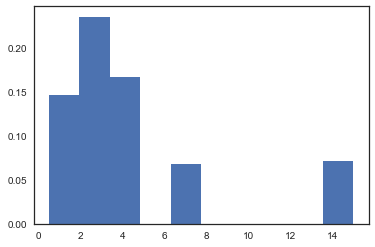

In [33]:
plt.hist(list(data.keys()), weights=list(data.values()), normed=True)

## Understanding plt.hist

How does matplotlib decide the bin width? Let's try with the IMDb data.

In [ ]:
# TODO: Load IMDB data into movie_df using pandas


Plot the histogram of movie ratings using the `plt.hist()` function.

In [ ]:
plt.hist(movie_df['Rating'])


Have you noticed that this function returns three objects? Take a look at the documentation [here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) to figure out what they are.

To get the returned three objects:

In [ ]:
n_raw, bins_raw, patches = plt.hist(movie_df['Rating'])
print(n_raw)
print(bins_raw)

Actually, `n_raw` contains the values of histograms, i.e., the number of movies in each of the 10 bins. Thus, the sum of the elements in `n_raw` should be equal to the total number of movies:

In [ ]:
# TODO: test whether the sum of the numbers in n_raw is equal to the number of movies. 

The second returned object (`bins_raw`) is a list containing the edges of the 10 bins: the first bin is \[1.0,1.89\], the second \[1.89,2.78\], and so on.

Noticed that the width of each bin is the same? This is equal-width binning. We can calculate the width as:

In [ ]:
min_rating = min(movie_df['Rating'])
max_rating = max(movie_df['Rating'])
print(min_rating, max_rating)
print( (max_rating-min_rating) / 10 )

Now, let's plot the histogram where the y axis is normed.

In [ ]:
n, bins, patches = plt.hist(movie_df['Rating'], normed=True)
print(n)
print(bins)

In this case, the edges of the 10 bins do not change. But now `n` represents the heights of the bins. In other words, the sum of the area of each bar will equal to 1. Can you verify this?

Hint: the area of each bar is calculated as height * bin width. Because of the way computers store float numbers, you'll probably get something like 0.99999999999999978 instead of 1.

In [ ]:
# TODO: verify that the sum of areas equals to 1.

## Selecting binsize

A nice to way to explore this is using the "[small multiples](https://www.google.com/search?client=safari&rls=en&q=small+multiples&ie=UTF-8&oe=UTF-8)" with a set of sample bin sizes. In other words, pick some binsizes that you want to see and draw many plots within a single "figure". Read about [subplot](https://www.google.com/search?client=safari&rls=en&q=matplotlib+subplot&ie=UTF-8&oe=UTF-8). For instance, you can do something like:

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
movie_df['Rating'].hist(bins=3)
plt.subplot(1,2,2)
movie_df['Rating'].hist(bins=100)

What does the argument in `plt.subplot(1,2,1)` mean?  
http://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

So we can create 8 subplots (2 rows and 4 columns) with the given `binsizes`. 

In [ ]:
binsizes = [2, 3, 5, 10, 30, 40, 60, 100 ]

plt.figure(1, figsize=(18,8))
for i, bins in enumerate(binsizes): 
    # TODO: use subplot and hist() function to draw 8 plots
   


Do you notice weird patterns that emerge from `bins=40`? Can you guess why do you see such patterns? What are the peaks and what are the empty bars? What do they tell you about choosing the binsize in histograms?

In [ ]:
# TODO: Provide your explanation and evidence here

Now, let's try to apply several algorithms from class for finding the number of bins (called `nbins`). 

* Freedman-Diaconis: $\text{width} = 2 \frac{\text{IQR}}{N^{1/3}}$;
* Sqrt root: $\text{nbins} = \sqrt{N}$;
* Sturge's formula: $\text{nbins} = \lceil \log_2 N + 1 \rceil$

Here, IQR is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range) of our data (movie ratings). $N$ is the number of movies. $\lceil \cdot \rceil$ is the [ceiling function](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions), and we can use [`np.ceil()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ceil.html) function to calculate it.

In [ ]:
N = len(movie_df['Rating'])

# TODO: plot three histograms based on three formulae. One of them is provided as an example. 

plt.figure(figsize=(12,4))

# Freedman-Diaconis
data = movie_df['Rating'].order()
iqr = np.percentile(data, 75) - np.percentile(data, 25)
width = 2*iqr/np.power(N, 1/3)
nbins = int((max(data) - min(data)) / width)

plt.subplot(1,3,3)
plt.title("F-D, {} bins".format(nbins))
movie_df['Rating'].hist(bins=nbins)

# Sqrt root

# Sturge's formula



# Boxplot

Let's look at the example data that we looked at during the class. 

In [ ]:
data = [-1, 3, 3, 4, 15, 16, 16, 17, 23, 24, 24, 25, 35, 36, 37, 46]

The [**`numpy.percentile()`**](http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html) function provides a way to calculate the percentiles. Note that using the option `interpolation`, you can specify which value to take when the percentile value lies in between numbers. The default is linear. 

In [ ]:
print(np.percentile(data, 25))
print(np.percentile(data, 50), np.median(data))
print(np.percentile(data, 75))

Can you explain why do you get those first and third quartile values? The first quantile value is not 4, not 15, and not 9.5. Why?

Let's draw a boxplot with matplotlib. 

In [ ]:
# TODO: draw a boxplot of the data
